In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
data=pd.read_csv('IOT-temp.csv')
data['noted_date'] = pd.to_datetime(data['noted_date'])
data.set_index('noted_date', inplace=True)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97606 entries, 2018-08-12 09:30:00 to 2018-07-28 07:06:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   temp        97606 non-null  int64 
 3   out/in      97606 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [107]:
data_new=data.drop(['id','room_id/id'],axis=1)
data_new

,temp,out/in
noted_date,,
2018-08-12 09:30:00,29,In
2018-08-12 09:30:00,29,In
2018-08-12 09:29:00,41,Out
2018-08-12 09:29:00,41,Out
2018-08-12 09:29:00,31,In
...,...,...
2018-07-28 07:07:00,31,In
2018-07-28 07:07:00,31,In
2018-07-28 07:06:00,31,In


In [108]:
data_new.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [109]:
data_new.isnull().sum()

temp      0
out/in    0
dtype: int64

In [110]:
data_new["temp"].max()

51

In [111]:
data_new["temp"].min()

21

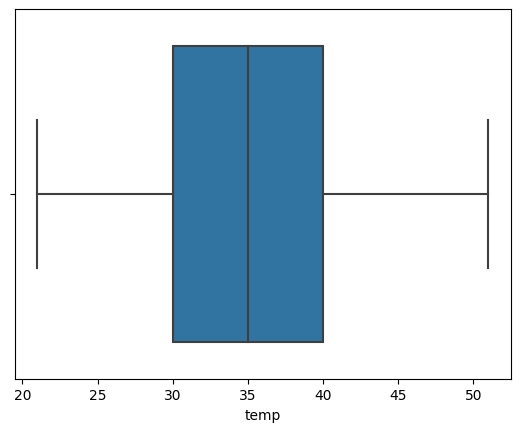

In [112]:
sns.boxplot(data=data_new, x="temp")
plt.show()

In [113]:
data_new.nunique()

temp      31
out/in     2
dtype: int64

In [114]:
data_new["out/in"].isin(["In", "Out"])

noted_date
2018-08-12 09:30:00    True
2018-08-12 09:30:00    True
2018-08-12 09:29:00    True
2018-08-12 09:29:00    True
2018-08-12 09:29:00    True
                       ... 
2018-07-28 07:07:00    True
2018-07-28 07:07:00    True
2018-07-28 07:06:00    True
2018-07-28 07:06:00    True
2018-07-28 07:06:00    True
Name: out/in, Length: 97606, dtype: bool

In [115]:
~data_new["out/in"].isin(["In", "Out"])

noted_date
2018-08-12 09:30:00    False
2018-08-12 09:30:00    False
2018-08-12 09:29:00    False
2018-08-12 09:29:00    False
2018-08-12 09:29:00    False
                       ...  
2018-07-28 07:07:00    False
2018-07-28 07:07:00    False
2018-07-28 07:06:00    False
2018-07-28 07:06:00    False
2018-07-28 07:06:00    False
Name: out/in, Length: 97606, dtype: bool

In [116]:
data_new[data_new["out/in"].isin(["In", "Out"])].head()

,temp,out/in
noted_date,,
2018-08-12 09:30:00,29,In
2018-08-12 09:30:00,29,In
2018-08-12 09:29:00,41,Out
2018-08-12 09:29:00,41,Out
2018-08-12 09:29:00,31,In


<Axes: xlabel='temp', ylabel='out/in'>

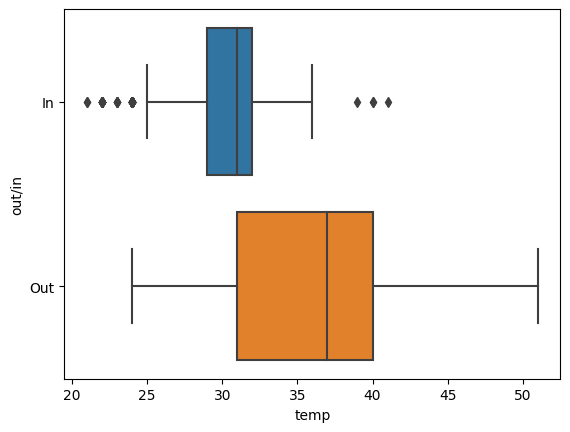

In [117]:
sns.boxplot(data=data_new, x="temp", y="out/in")

In [118]:
data_new.groupby("out/in").mean()

,temp
out/in,
In,30.453920
Out,36.265244


In [119]:
data_new.groupby("out/in").agg(
    mean_tem=("temp", "mean"),
    std_temp=("temp", "std"),
    median_temp=("temp", "median"),
    min_temp=("temp", "min"),
    max_temp=("temp", "max")
)

,mean_tem,std_temp,median_temp,min_temp,max_temp
out/in,,,,,
In,30.453920,2.238101,31.0,21,41
Out,36.265244,5.717055,37.0,24,51


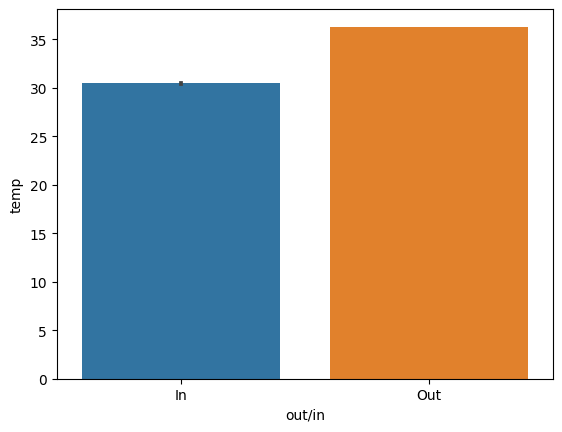

In [120]:
sns.barplot(data=data_new, x="out/in", y="temp")
plt.show()

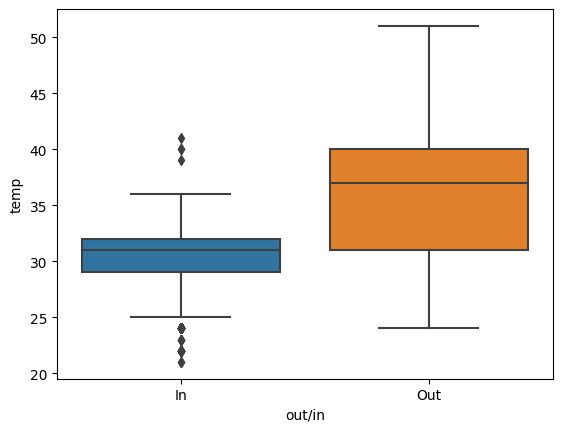

In [121]:
sns.boxplot(data=data_new, x="out/in", y="temp")
plt.show()